In [1]:
PATH_TO_CSV = '/home/mehdi/minecraft-copilot-ml/output/lightning_logs/version_0/metrics.csv'
PATH_TO_MODEL = '/home/mehdi/minecraft-copilot-ml/output/last_model.pth'

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv(PATH_TO_CSV)
df.columns

Index(['val_loss_step', 'step', 'val_loss_epoch', 'epoch', 'train_loss_epoch'], dtype='object')

<Axes: xlabel='epoch', ylabel='train_loss_epoch'>

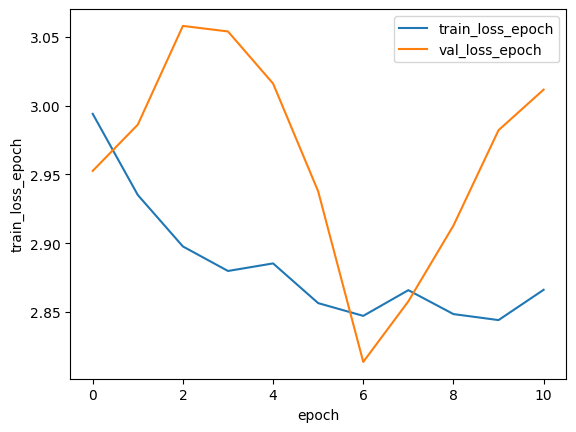

In [5]:
from seaborn import lineplot

lineplot(data=df, x='epoch', y='train_loss_epoch', label='train_loss_epoch')
lineplot(data=df, x='epoch', y='val_loss_epoch', label='val_loss_epoch')

In [6]:
from torch import load
import numpy as np

model = load(PATH_TO_MODEL)
block_dict = model.unique_blocks_dict
random_map = np.random.randint(0, len(block_dict), (16, 16, 16))
random_map = np.vectorize(block_dict.get)(random_map)
random_map = np.expand_dims(random_map, axis=0)
res = model(random_map)


{'minecraft:nether_brick_fence': 0,
 'minecraft:wooden_door': 1,
 'minecraft:stone_stairs': 2,
 'minecraft:glass': 3,
 'minecraft:enchanting_table': 4,
 'minecraft:cobblestone': 5,
 'minecraft:gravel': 6,
 'minecraft:ladder': 7,
 'minecraft:grass': 8,
 'minecraft:air': 9,
 'minecraft:wood': 10,
 'minecraft:stone_brick_stairs': 11,
 'minecraft:wall_sign': 12,
 'minecraft:torch': 13,
 'minecraft:obsidian': 14,
 'minecraft:trapdoor': 15,
 'minecraft:stone_slab': 16,
 'minecraft:dirt': 17,
 'minecraft:redstone_torch': 18,
 'minecraft:oak_stairs': 19,
 'minecraft:stonebrick': 20}

(1, 16, 16, 16)